# Problem-2 (Demand Task)

In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

In [2]:
df = pd.read_csv('datasets/Date and model wise sale.csv')

In [3]:
df.shape

(46116, 3)

In [4]:
df.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


In [5]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [15]:
# Adding date features

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [18]:
sell_by_year = df.groupby('year')['Count'].sum()

print(sell_by_year)

year
2014     370989
2015    2024037
2016    2063935
Name: Count, dtype: int64


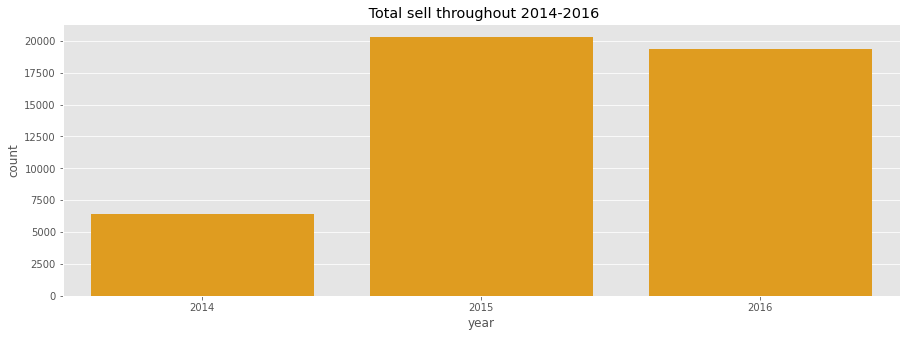

In [23]:
plt.figure(figsize=(15,5))
plt.title(' Total sell throughout 2014-2016')
sns.countplot(x='year', data=df, color='orange')
plt.savefig('plots/total_sell_2014_16.jpg')
plt.show()

In [25]:
print('Starting date on the dataset')
print(min(df['Date']))
print('Ending date on the dataset')
print(max(df['Date']))

Starting date on the dataset
2014-01-01 00:00:00
Ending date on the dataset
2016-08-31 00:00:00


In [27]:
sell_by_month = df.groupby('month')['Count'].sum()
print(sell_by_month)

month
1     251353
2     260113
3     281343
4     270841
5     321164
6     481399
7     808157
8     703693
9     351850
10    296351
11    218058
12    214639
Name: Count, dtype: int64


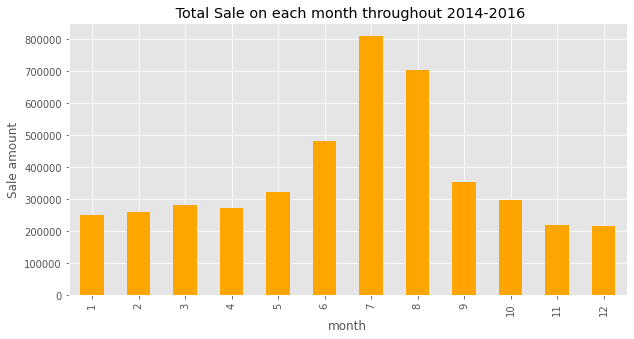

In [29]:
#Total sell on each month throughout 2014-2016

plt.figure(figsize=(10,5))
plt.title(' Total Sale on each month throughout 2014-2016')
plt.ylabel('Sale amount')
df.groupby('month').Count.sum().plot(kind='bar',color='orange')
plt.savefig('plots/sell_by_months.jpg')
plt.show()

In [30]:
df['Model'].unique()

array(['M45', 'M121', 'M122', 'M91', 'M66', 'M100', 'M5', 'M14', 'M62',
       'M15', 'M61', 'M82', 'M108', 'M55', 'M43', 'M31', 'M90', 'M96',
       'M69', 'M76', 'M56', 'M92', 'M72', 'M94', 'M8', 'M97', 'M71',
       'M57', 'M107', 'M99', 'M18', 'M30', 'M36', 'M86', 'M13', 'M73',
       'M81', 'M41', 'M79', 'M70', 'M110', 'M95', 'M51', 'M117', 'M22',
       'M10', 'M65', 'M115', 'M75', 'M124', 'M2', 'M42', 'M112', 'M27',
       'M53', 'M60', 'M120', 'M23', 'M4', 'M39', 'M48', 'M32', 'M87',
       'M6', 'M64', 'M68', 'M17', 'M7', 'M24', 'M44', 'M16', 'M77', 'M78',
       'M28', 'M12', 'M1', 'M84', 'M11', 'M25', 'M20', 'M105', 'M88',
       'M109', 'M21', 'M19', 'M40', 'M9', 'M116', 'M50', 'M67', 'M93',
       'M89', 'M63', 'M123', 'M119', 'M49', 'M52', 'M102', 'M85', 'M126',
       'M59', 'M38', 'M103', 'M74', 'M98', 'M37', 'M113', 'M125', 'M104',
       'M26', 'M35', 'M80', 'M127', 'M111', 'M118', 'M101', 'M58', 'M47',
       'M114', 'M54', 'M29', 'M34', 'M33', 'M106'], dtype=object)

In [32]:
#Total numbers of models

total_no_of_models = len(df.Model.unique())
print(total_no_of_models)

124


In [33]:
#model and sale relationship 
models_by_sale = df.groupby('Model')['Count'].sum()
models_by_sale.sort_values(axis=0, ascending=False, inplace=True)

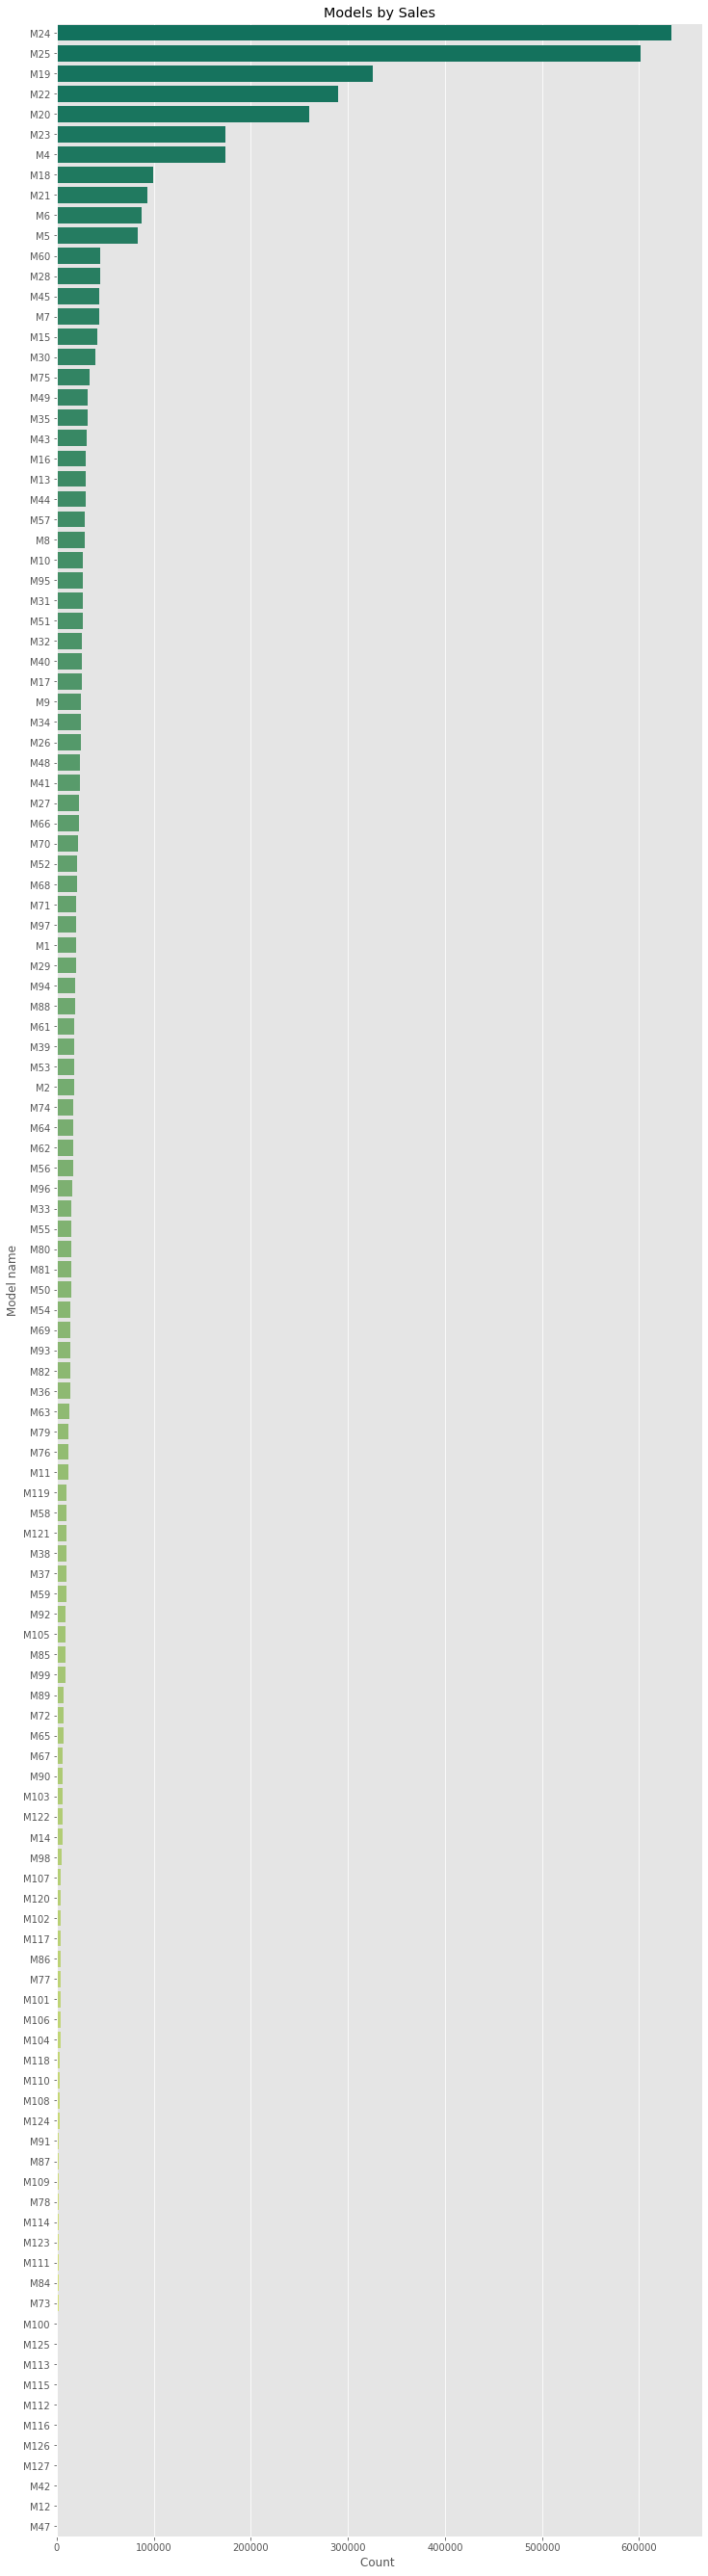

In [38]:
#figure model by count

f, ax = plt.subplots(figsize=(12, 48))
ax=sns.barplot(models_by_sale, models_by_sale.index,orient='h', palette='summer')
ax.set(title='Models by Sales',xlabel='Count ', ylabel='Model name')
plt.savefig('plots/models_by_sales.jpg')
plt.show()

In [39]:
new_df = df.copy()

In [43]:
new_df.head()

,Date,Model,Count,day,month,year
0,2016-08-31,M45,5,31,8,2016
1,2016-08-31,M121,3,31,8,2016
2,2016-08-31,M122,4,31,8,2016
3,2016-08-31,M91,10,31,8,2016
4,2016-08-31,M66,57,31,8,2016
